# Import Library

In [2]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dropout,Flatten,Dense,GlobalAveragePooling2D

# Load Test and Train files

In [3]:
files_train = 0
files_validation = 0
cwd = os.getcwd()
folder = 'train_data/train'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_train +=len(files)
    
folder = 'train_data/test'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_validation +=len(files)

print(files_train, files_validation)

432 162


# Set Parameters

In [4]:
img_width,img_height=48,48

train_data_dir='train_data/train'
validation_data_dir="train_data/test"

nb_train_sample=files_train
nb_validation_sample=files_validation

batch_size=32
epoch=30
num_classes=2

# Build model on top of VGG


In [5]:
model = applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (img_width, img_height, 3))


In [6]:
model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [7]:
for layer in model.layers:
    layer.trainable = False

In [8]:
x = model.output
x = Flatten()(x)

predictions = Dense(num_classes, activation = 'softmax')(x)
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = 'categorical_crossentropy', 
                    #optimizer = optimizers.SGD(lr = 0.0001, momentum=0.9), 
                    metrics=['accuracy'])

# Data Augumentation

In [9]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1, 
                  height_shift_range=0.1, rotation_range=5)

test_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1, 
                  height_shift_range=0.1, rotation_range=5)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

Found 432 images belonging to 2 classes.
Found 162 images belonging to 2 classes.


In [10]:
history = model_final.fit(
    train_generator, 
    steps_per_epoch=nb_train_sample // batch_size, 
    validation_steps=nb_validation_sample // batch_size, 
    epochs=epoch, 
    validation_data=validation_generator
)

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681ms/step - accuracy: 0.7887 - loss: 0.4640

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7876 - loss: 0.4631 - val_accuracy: 0.7812 - val_loss: 0.4221
Epoch 2/30
 1/13 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.7812 - loss: 0.3722

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.7812 - loss: 0.3722 - val_accuracy: 0.7688 - val_loss: 0.4130
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 320ms/step - accuracy: 0.8026 - loss: 0.3512 - val_accuracy: 0.8375 - val_loss: 0.3413
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.8438 - loss: 0.2987 - val_accuracy: 0.8500 - val_loss: 0.3588
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 313ms/step - accuracy: 0.9078 - loss: 0.2770 - val_accuracy: 0.8687 - val_loss: 0.3124
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9062 - loss: 0.2724 - val_accuracy: 0.8625 - val_loss: 0.3209
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 304ms/step - accuracy: 0.9309 - loss: 0.2528 - val_accuracy: 0.8875 - val_loss: 0.2879
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 1.0000 - loss: 0.1739 - val_accuracy: 0.8875 - val_loss: 0.2936
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 301ms/step - accuracy: 0.9445 - loss: 0.2131 - val_accuracy: 0.9125 - val_los

In [11]:
history.history

{'accuracy': [0.7724999785423279,
  0.78125,
  0.8125,
  0.84375,
  0.9024999737739563,
  0.90625,
  0.9275000095367432,
  1.0,
  0.9399999976158142,
  0.90625,
  0.9599999785423279,
  0.96875,
  0.942307710647583,
  0.875,
  0.9599999785423279,
  1.0,
  0.9574999809265137,
  0.96875,
  0.9549999833106995,
  0.9375,
  0.9599999785423279,
  0.96875,
  0.9624999761581421,
  1.0,
  0.9574999809265137,
  0.96875,
  0.9700000286102295,
  1.0,
  0.9725000262260437,
  1.0],
 'loss': [0.4518885016441345,
  0.37220194935798645,
  0.3432178497314453,
  0.2986983060836792,
  0.2830437421798706,
  0.2724003493785858,
  0.24842049181461334,
  0.17394119501113892,
  0.21342936158180237,
  0.2520173192024231,
  0.18899276852607727,
  0.20216037333011627,
  0.17342066764831543,
  0.4643838405609131,
  0.1693550944328308,
  0.12257564067840576,
  0.15616391599178314,
  0.13327771425247192,
  0.1479833424091339,
  0.2046630084514618,
  0.14627361297607422,
  0.09541448205709457,
  0.12998075783252716,
 

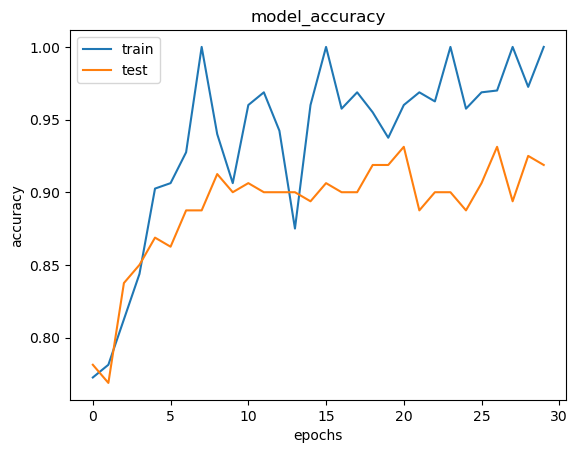

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

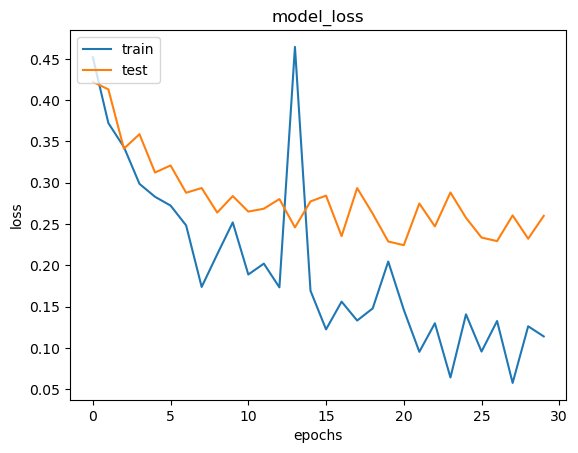

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [14]:
model_final.save('model/model_final.h5')

In [15]:
class_dictionary = {}
class_dictionary[0]  = 'no_car'
class_dictionary[1]  = 'car'

In [16]:

class_dictionary

{0: 'no_car', 1: 'car'}

In [17]:
import cv2
import numpy as np

def make_prediction(image):
    image = cv2.imread(image)
    image = cv2.resize(image, (48,48))
    img = image/255
#     (1, 48, 48, 3) -> 4D Tensor
    img = np.expand_dims(img, axis = 0)
    
    class_predicted = model_final.predict(img)
    intId = np.argmax(class_predicted[0])
    label = class_dictionary[intId]
    return label

In [21]:
make_prediction("C:\\Users\\DELL\\Desktop\\Car Parking Detection\\train_data\\train\\occupied\\roi_5.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


'car'

In [22]:
make_prediction("C:\\Users\\DELL\\Desktop\\Car Parking Detection\\train_data\\test\\empty\\spot1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


'no_car'

In [23]:
model_final.save("model/model_final.h5")